In [27]:
from zipfile import ZipFile
import os
from kaggle.api.kaggle_api_extended import KaggleApi
import pandas as pd
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize

In [3]:
dataset = "https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews?select=Reviews.csv"

In [ ]:
od.download(dataset)

In [4]:
df = pd.read_csv('amazon-fine-food-reviews/Reviews.csv')

In [5]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [6]:
# null values
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [7]:
# drop null values
df = df.dropna()

In [8]:
# No null values
df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 568401 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568401 non-null  int64 
 1   ProductId               568401 non-null  object
 2   UserId                  568401 non-null  object
 3   ProfileName             568401 non-null  object
 4   HelpfulnessNumerator    568401 non-null  int64 
 5   HelpfulnessDenominator  568401 non-null  int64 
 6   Score                   568401 non-null  int64 
 7   Time                    568401 non-null  int64 
 8   Summary                 568401 non-null  object
 9   Text                    568401 non-null  object
dtypes: int64(5), object(5)
memory usage: 47.7+ MB


In [10]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568401.000000,568401.000000,568401.000000,568401.000000,5.684010e+05
mean,284228.120582,1.743903,2.227911,4.183297,1.296261e+09
std,164098.955187,7.636845,8.288820,1.310376,4.803804e+07
min,1.000000,0.000000,0.000000,1.000000,9.393408e+08
25%,142116.000000,0.000000,0.000000,4.000000,1.271290e+09
50%,284225.000000,0.000000,1.000000,5.000000,1.311120e+09
75%,426342.000000,2.000000,2.000000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.000000,5.000000,1.351210e+09


<Axes: xlabel='Score'>

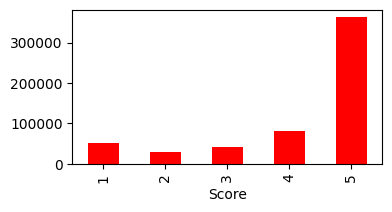

In [11]:
df['Score'].value_counts().sort_index().plot(kind = 'bar',
                                             color = 'red',
                                            figsize = (4,2))

In [12]:
df.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...


In [20]:
t = df['Text'][0]
t

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [ ]:
# word_tokenize separa frases em palavras
tokens = word_tokenize(df['Text'], language='english',preserve_line=False)

In [39]:
print(tokens)

['I', 'have', 'bought', 'several', 'of', 'the', 'Vitality', 'canned', 'dog', 'food', 'products', 'and', 'have', 'found', 'them', 'all', 'to', 'be', 'of', 'good', 'quality', '.', 'The', 'product', 'looks', 'more', 'like', 'a', 'stew', 'than', 'a', 'processed', 'meat', 'and', 'it', 'smells', 'better', '.', 'My', 'Labrador', 'is', 'finicky', 'and', 'she', 'appreciates', 'this', 'product', 'better', 'than', 'most', '.']


In [43]:
# Processo de atribuir uma etiqueta de parte do discurso a cada palavra em uma sentença para indicar sua classe gramatical, substantivo, verbo, adjetivo, etc.
tagged = nltk.pos_tag(tokens)
tagged[0:5]

[('I', 'PRP'),
 ('have', 'VBP'),
 ('bought', 'VBN'),
 ('several', 'JJ'),
 ('of', 'IN')]

In [51]:
 # Classificação de entidades nomeadas, como pessoas, locais, data e etc
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  I/PRP
  have/VBP
  bought/VBN
  several/JJ
  of/IN
  the/DT
  (ORGANIZATION Vitality/NNP)
  canned/VBD
  dog/RP
  food/NN
  products/NNS
  and/CC
  have/VBP
  found/VBN
  them/PRP
  all/DT
  to/TO
  be/VB
  of/IN
  good/JJ
  quality/NN
  ./.
  The/DT
  product/NN
  looks/VBZ
  more/RBR
  like/IN
  a/DT
  stew/NN
  than/IN
  a/DT
  processed/JJ
  meat/NN
  and/CC
  it/PRP
  smells/VBZ
  better/RBR
  ./.
  My/PRP$
  (ORGANIZATION Labrador/NNP)
  is/VBZ
  finicky/JJ
  and/CC
  she/PRP
  appreciates/VBZ
  this/DT
  product/NN
  better/JJR
  than/IN
  most/JJS
  ./.)


### VADER Sentiment Scoring
Usando a biblioteca **SentimentIntensityAnalyzer** para selecionar neg/neu/pos do texto

In [52]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [57]:
sia = SentimentIntensityAnalyzer()

In [183]:
sia.polarity_scores('I like you')

{'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'compound': 0.3612}

In [66]:
sia.polarity_scores(t)

{'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441}

In [73]:
# Rodar o Polarity_scores no dataset
text_res = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
    text = row['Text']
    myid = row['Id']
    text_res[myid] = sia.polarity_scores(text)

  0%|          | 0/568401 [00:00<?, ?it/s]

In [154]:
text_res[1]

{'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441}

In [155]:
# Transpor dados
vaders = pd.DataFrame(text_res).T
vaders.head()

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468


In [156]:
# Resetando a coluna index e renomeando para Id
vaders = vaders.reset_index().rename(columns = {'index': 'Id'})
vaders.head(1)

,Id,neg,neu,pos,compound
0,1,0.0,0.695,0.305,0.9441


In [157]:
# Join com a tabela df

vaders = vaders.merge(df, how = 'left')
vaders.head(1)

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.0,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...


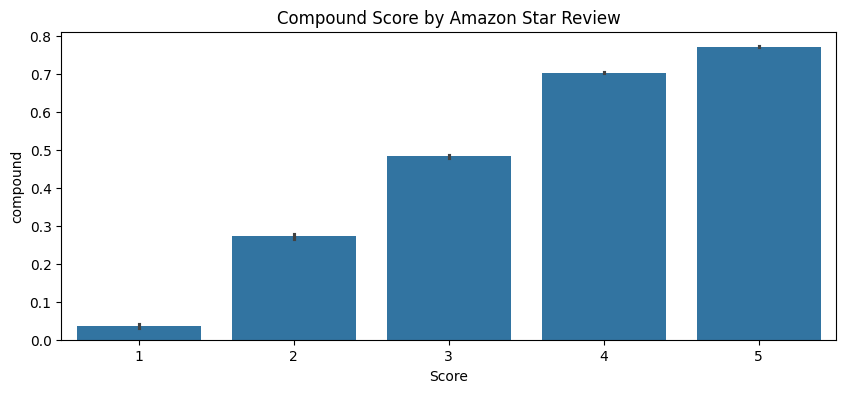

In [172]:
plt.figure(figsize = (10,4))
ax = sns.barplot(data = vaders,x = 'Score', y = 'compound')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()

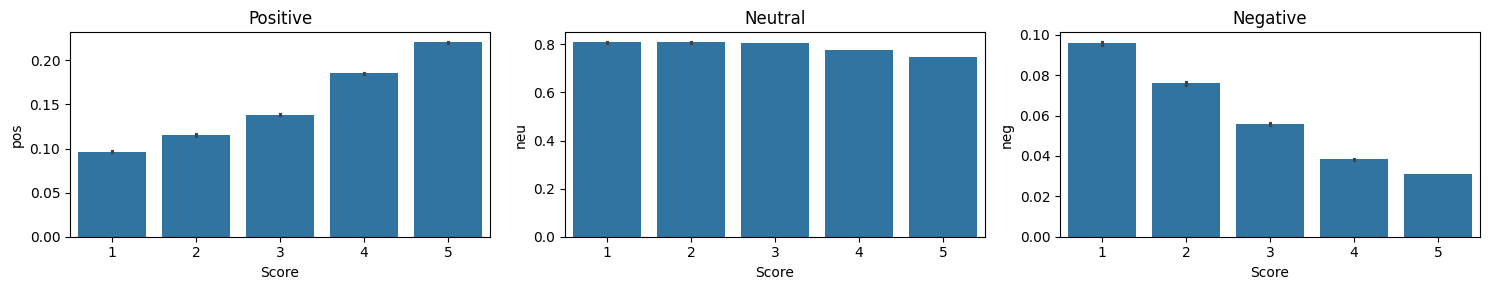

In [180]:
fig, axs = plt.subplots(1,3, figsize = (15,3))
sns.barplot(data=vaders, x = 'Score', y = 'pos', ax = axs[0])
sns.barplot(data=vaders, x = 'Score', y = 'neu', ax = axs[1])
sns.barplot(data=vaders, x = 'Score', y = 'neg', ax = axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()